# Project Description 
This project aims to create a pipeline for image processing to detect lane lines based on camera images 

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
import pickle
import glob

## 1. Camera Calibration 
This part of the code serves as the pipeline for the camera calibration to correct distortion 

In [2]:
# prepare object and image points for undistortion 
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

#        # Draw and display the corners
#        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#        cv2.imshow('img',img)
#        cv2.waitKey(500)
#cv2.destroyAllWindows()





In [3]:
#Function definition for undistortion 
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
    imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    return undist

In [4]:
#apply undistort on one of the images
img = cv2.imread('camera_cal/calibration1.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)
cv2.imwrite('camera_cal/calibration1_undistorted.jpg', undistorted)


True

## 2. Perspective Transform

In [64]:
def unwarp(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    print(M)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

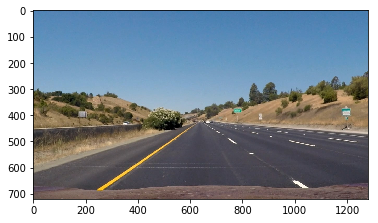

In [47]:
image = plt.imread('test_images/straight_lines1.jpg')
plt.imshow(image, cmap='RdBu')

[[-3.40109218e-01 -1.52133562e+00  8.45826881e+02]
 [ 1.87790366e-02  2.50387155e-01 -1.92485125e+02]
 [ 2.60819953e-05 -2.46855218e-03  1.00000000e+00]]


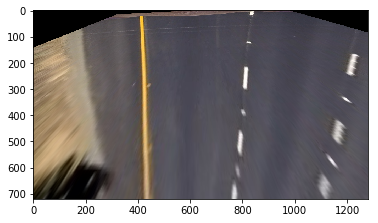

In [65]:
h = image.shape[0]
w = image.shape[1]
src = np.float32([(250, 750), (600, 450), (1050, 690), (700, 450)])
dst = np.float32([(450, 0), (450, h), (w-450, 0), (w-450, h)])

image_unwarp = unwarp(image, src, dst)
plt.imshow(image_unwarp, cmap='RdBu')


In [45]:
image.shape[:-1]

(720, 1280)